# Table of contents
TODO: titles with internal links to move there

# 1) Introduction
Group members:
- Chaehui Kim (M250132)
- Eugene Phang (EPHANG002)
- Abhinav Kiran Korety ()
- Kwan Wei Yin Joel ()

# 2) Decomposition and breakdown

blah blah

# 3) Analysis of data given (records.csv)

# Extracting Data from CSV

file = original excel file
rawFileData = giant list where each item is a row converted into a single string
fileHeader = first row "Tutorial Group,Student ID,School,Name,Gender,CGPA"
fileData = each row in the file turned into a list of cells as strings
studentData = list of dictionaries, each representing a student's data ('student ID', 'TG', 'School', 'Name', 'Gender', 'CGPA')

In [1]:
file = open("records.csv", "r")
rawFileData = file.readlines()
fileData = []
for i in rawFileData:
    i = i.split(",")
    i[5] = i[5].replace('\n', '')
    fileData.append(i)
fileHeader = fileData.pop(0) #list of cells from first line

file.close()
print(fileData[0])

['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02']


In [2]:
def initStudents():      #creates studentData, a list of dictionaries, each representing a student
    studentData = []
    studentCount = 0
    for row in fileData:
        studentCount += 1
        if row[4] == 'Male':
            gender = True
        elif row[4] == 'Female':
            gender = False
        studentData.append({'ID': int(row[1]),'TG': int(row[0][2:]), 'School': row[2], 'Name': row[3], 'Gender': gender, 'CGPA': float(row[5])})
    return studentData

studentData = initStudents()
print(studentData[0])
print(len(studentData))

{'ID': 5002, 'TG': 1, 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': True, 'CGPA': 4.02}
6000


We want to analyse the data using graphs

Gender - _Pie Chart_ (Only looking for distribution of **Female** and **Male** students)

School - _Bar Graph_ (Give us clear representation of **number of students** in each **School**)

CGPA - _Box Plot_ (To show us extra information such as **Outliers**,**Median** and **Upper & Lower quartile**)


So we group all the data we need into a list

In [3]:
def getdataintolist(Data):
    list_of_school1 = []
    list_of_gender1 = []
    list_of_CGPA1 = []
    for student in Data:
        list_of_school1.append(student['School'])
        list_of_gender1.append(student['Gender'])
        list_of_CGPA1.append(student['CGPA'])
    T_raw_list = [list_of_gender1, list_of_school1, list_of_CGPA1]
    return T_raw_list



A function to prep data to put a List conatining lists of Gender, School, CGPA only their labels excluding CGPA cause no label needed

In [4]:
def data_prep(T_raw_list):
    #print(Gender_list)

    # Convert CGPA strings to floats 
    list_of_CGPA_float = [float(i) for i in T_raw_list[2]]

    # convert boolean list to string list fo Female = 0 and male = 1
    Gender_list_string = ['Male' if g is True else 'Female' for g in T_raw_list[0]]
    #print(Gender_list_string)

    #adding all lists to a tuple for easy access
    Tlist_of_data = [Gender_list_string, T_raw_list[1], list_of_CGPA_float]

    # Creating list of unique labels and raw data counts
    list_of_labels = []
    Tlist_of_rawdata = []

    # iterate through list to get gender and school data counts only
    for data in Tlist_of_data[:2]:
        unq_data_list = list(set(data))
        total = 0
        data_count = []
        for string in unq_data_list:
            count = data.count(string)
            data_count.append(count) 
            total += count
            print(f"{string}: {count}")
        Tlist_of_rawdata.append(data_count)
        list_of_labels.append(unq_data_list)
    Tlist_of_rawdata.append(list_of_CGPA_float)

    #print(list_of_labels)
     
    return Tlist_of_rawdata, list_of_labels





Then import matplotlib for plotting

In [5]:
import matplotlib.pyplot as plt

Function for pie chart

In [6]:
def pie_chart(Count, label):
    plt.pie(Count, labels=label, autopct='%1.1f%%')
    #plt.pie(gender_count, labels=list(unq_gender), autopct='%1.1f%%')
    plt.title("Gender Distribution", fontsize=20)
    plt.show()

Function for Bar graph

In [7]:
def bar_chart(school_count, unq_school):
    plt.figure(figsize=(17, 6))
    plt.bar(unq_school, school_count, color="g", width=0.7, label = "No of students")
    plt.xlabel("School", fontsize=14)
    plt.ylabel("No of students", fontsize=14)
    plt.title("Distribution of students in each school", fontsize=20)
    plt.legend()
    plt.show()

Function for Box & Whiskers

In [8]:
def Box_whisker(CGPA):
    plt.figure(figsize=(10, 6))
    plt.boxplot(CGPA)
    plt.title("Boxplot of CGPA", fontsize=20)

Show the total distribution of GPA, Gender and School

Male: 2759
Female: 3241
EEE: 788
WKW SCI: 150
CoB (NBS): 793
ASE: 104
CCEB: 465
LKCMedicine: 83
MSE: 156
HASS: 1
CoE: 275
MAE: 512
NIE: 199
SBS: 302
SSS: 425
CEE: 321
SoH: 332
SPMS: 276
ADM: 116
CCDS: 702


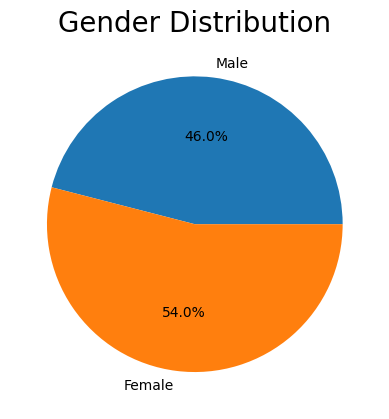

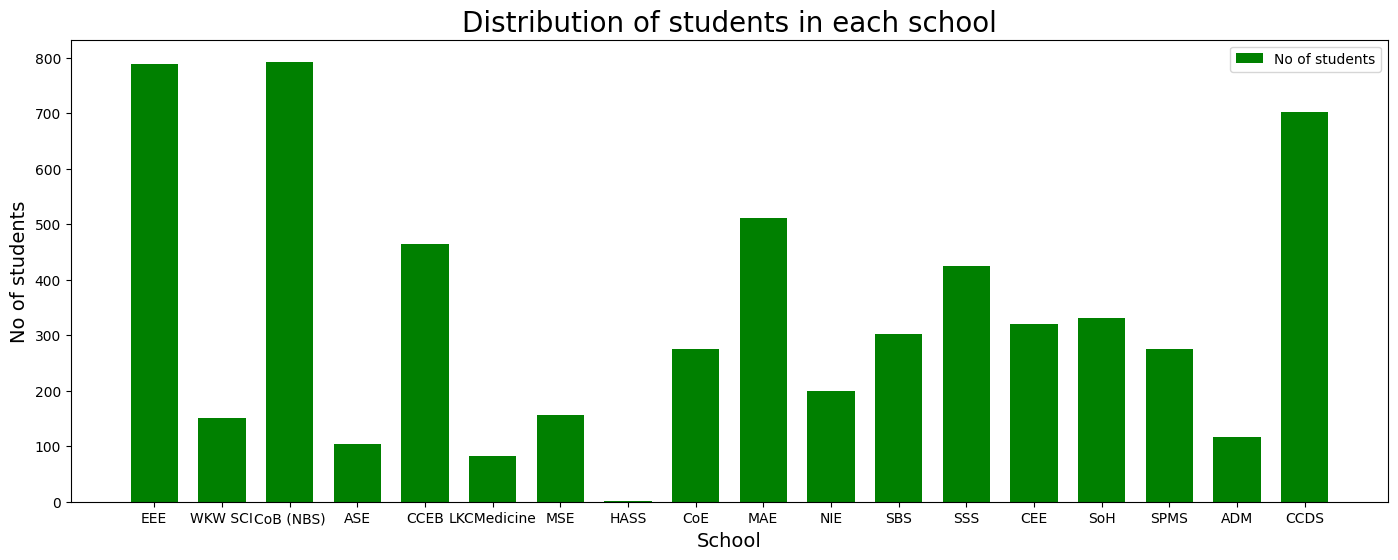

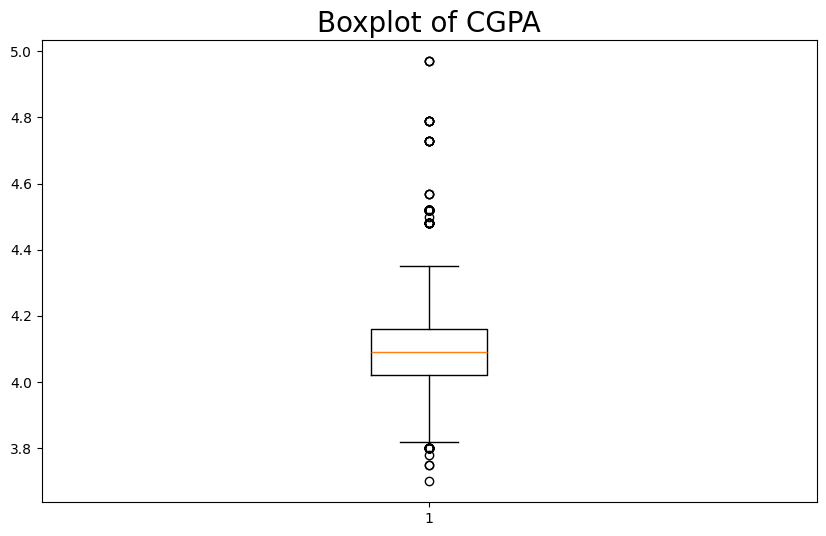

In [9]:
All_raw_list = getdataintolist(studentData)


T_list_all, label_all = data_prep(All_raw_list)

pie_chart(T_list_all[0],label_all[0])
bar_chart(T_list_all[1],label_all[1])
Box_whisker(T_list_all[2])

Function to show graphs of individual tutorial groups

Change number in Graphs_for_TG(x), where **x** represents the tut grp

In [10]:
def initStudents():      #creates studentData, a list of dictionaries, each representing a student
    studentData = []
    studentCount = 0
    for row in fileData:
        studentCount += 1
        if row[4] == 'Male':
            gender = True
        elif row[4] == 'Female':
            gender = False
        studentData.append({'ID': int(row[1]),'TG': int(row[0][2:]), 'School': row[2], 'Name': row[3], 'Gender': gender, 'CGPA': float(row[5])})
    return studentData

Male: 18
Female: 32
WKW SCI: 3
EEE: 5
CoB (NBS): 4
CCEB: 6
ASE: 1
MSE: 3
MAE: 3
NIE: 2
CEE: 4
SSS: 4
SBS: 3
SoH: 3
SPMS: 1
ADM: 1
CCDS: 7


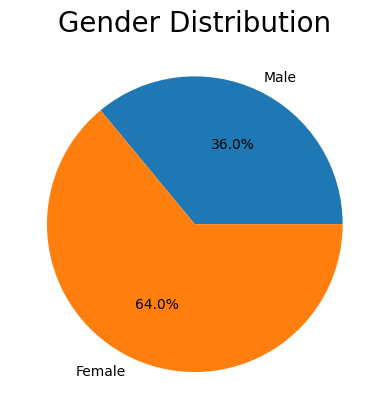

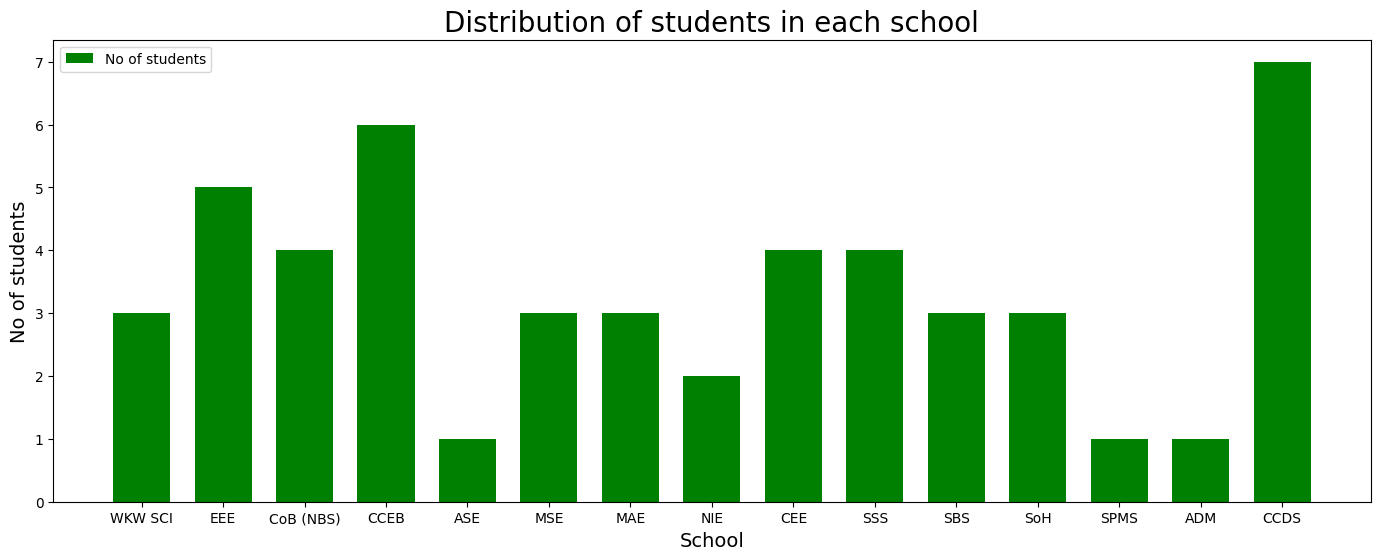

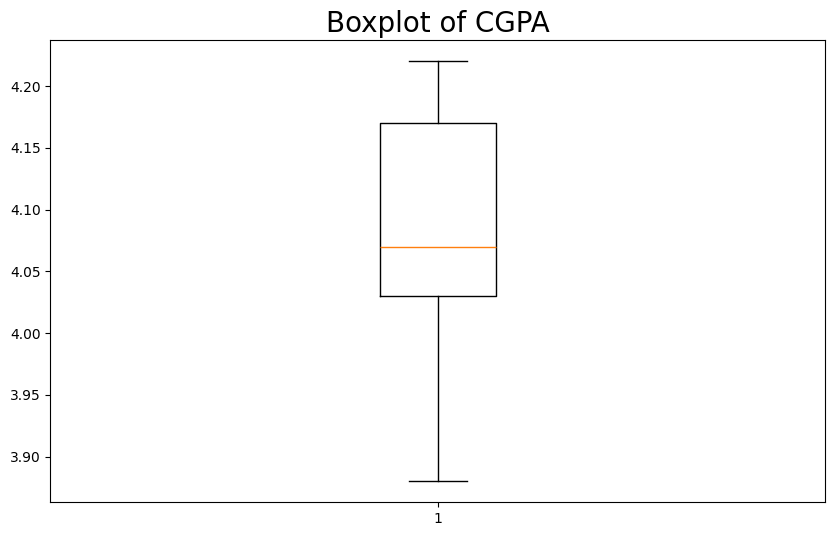

In [11]:
all_tgs = sorted(set(s['TG'] for s in studentData))


def Graphs_for_TG(tg_number):
    tg_students = []
    for y in studentData:
        tg = y['TG']
        if tg == tg_number:
            tg_students.append(y)

    
    T_raw_list = getdataintolist(tg_students)

    T_list_tg,label_tg = data_prep(T_raw_list)
    
    pie_chart(T_list_tg[0],label_tg[0])
    bar_chart(T_list_tg[1],label_tg[1])
    Box_whisker(T_list_tg[2])

Graphs_for_TG(2)




# 4) Design of Algorithm

## 4.1) Sorting Priorities
1. School
2. CGPA
3. Gender

We decided on this priority list based on what most strongly influences group dynamics / learning outcomes.

School was placed as the highest priority because we believe that the merit of a group project is the opportunity to experience and work with a diversity of perspectives that you wouldn't otherwise experience in a solo project. Students from different schools provide unique educational backgrounds and problem solving methods which encourages balanced and high quality work. 

CGPA is second priority as it is an indicator of academic performance and work consistency. Prioritising CGPAis crucial to achieve a balanced mix of abilities and ensure that no single group is disproportionately strong or weak academically. However, CGPA is still placed as a lower priority because we believe that CGPA is not wholly representative of one's abilities.

Gender was placed last as a final consideration to maintain inclusivity and promote balanced representation within each group. It acts as a guiding constraint in the algorithm. 

## 4.2) Group Sizes
Currently, we are given a simplified version of the problem in which the desired number of students per group ($n$) is $5$ and the existing dataset contains a total of $6000$ students. Since $5|6000$, we can safely make $\frac{6000}{5}=1200$ equal groups of $5$. However, in an extension of this problem, the professor may specify $n$ that does not exactly divide the total number of students in a given dataset.

In this case, we decided to handle the remainder students ($r$) by distributing them, one to each existing group, with the condition that the number of groups with $n$ students is greater than the number of groups with $n+1$ students. In other words, we distribute the students $\text{if }r<\frac{total}{2n}$ (Case 1), else create a separate group of size $r$ (Case 2).

This condition is to ensure that there doesn't arise a case where the professor asks for groups of $n$ but there are finally more groups of $n+1$ than there are groups of $n$ produced by the algorithm. 

The code written below demonstrates how this is implemented:

In [12]:
def createGrps(studentData, n):
    total = len(studentData) # Total number of students 
    r = total % n # Remainder of students when the population is divided into groups of n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1 # Number of final groups to be created
        
    # Deciding on the size of each group based on the rules specified
    grpSizes =  [n + 1 if i < r else n for i in range(numGrp)] if (r <= total/(2 * n)) else [r if i == total//n else n for i in range(numGrp)]
    print(f"{grpSizes} Size {len(grpSizes)}")

createGrps(studentData, 100) # Example: Simplified Case - n exactly divides total
createGrps(studentData, 34) # Example: Case 1 
createGrps(studentData, 134) # Example: Case 2 
createGrps(studentData, 261) # Example: Case 2 

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100] Size 60
[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34

## 4.3) Brainstorming: Individual Modular Diversification of Factors

Before arriving at a final solution, let us decompose the algorithm into its three constituent sections: diversification by CGPA, diversification by school, and diversification by gender. For this, we may come up with individual algorithms / rules to diversify each factor, and later combine the three to arrive at the final algorithm such that the priority order specified above is obeyed. 

### 4.3.1) Considering School Frequency: Diversifying School
To ensure that people in all schools are distributed diversely, we must distribute students in the order of the frequency of their respective schools in the population dataset. In other words, students belonging to schools with a higher number of representatives are distributed first, and those from smaller schools are assigned later.

This approach is logical because schools with larger student counts have a higher likelihood of forming clusters if they are left unregulated. By prioritizing their distribution early, we prevent these large groups from dominating the later stages of assignment, where additional lower priority constraints that are unrelated to school affiliation will take effect. At that point, having students from smaller schools remaining is less risky to diversity than if a large concentration of students from the same school were left unassigned.

The code written below demonstrates how this is implemented. Note that the code discards the other two factors and soley diversifies groups based on the students' schools.

In [13]:
def orderSchool (studentData):
    # Create a sorted list of schools in descending order of population
    schoolCnt = {}
    for student in studentData:
        schoolCnt[student['School']] = schoolCnt.get(student['School'], 0) + 1
    sortedSchools = sorted(schoolCnt.items(), key=lambda x: x[1], reverse=True)

    # Sort students based on the index of their school in sortedSchools 
    sortedStudents = sorted(studentData, key=lambda s: next(i for i, (school, _) in enumerate(sortedSchools) if school == s['School']))

    return [sortedSchools, sortedStudents]

orderedSchool = orderSchool(studentData)
print(orderSchool(studentData)[0], "\n")
for student in orderedSchool[1]:
    print(f"{student['Name']} {student['School']}")

[('CoB (NBS)', 793), ('EEE', 788), ('CCDS', 702), ('MAE', 512), ('CCEB', 465), ('SSS', 425), ('SoH', 332), ('CEE', 321), ('SBS', 302), ('SPMS', 276), ('CoE', 275), ('NIE', 199), ('MSE', 156), ('WKW SCI', 150), ('ADM', 116), ('ASE', 104), ('LKCMedicine', 83), ('HASS', 1)] 

Ajay Verma CoB (NBS)
Areeba Khan CoB (NBS)
Felix Yip CoB (NBS)
Harlow Wang CoB (NBS)
Isabella Thompson CoB (NBS)
Nisha Das CoB (NBS)
Oliver Tan CoB (NBS)
Vivi Dwi CoB (NBS)
Christopher Miller CoB (NBS)
Leo Xu CoB (NBS)
Michael Miller CoB (NBS)
Paula Wong CoB (NBS)
Alina Malik CoB (NBS)
Ameer Bin Rahman CoB (NBS)
Fangling CoB (NBS)
Fergus Mendoza CoB (NBS)
Han Zhang CoB (NBS)
Maya Ong CoB (NBS)
Siti Maryam CoB (NBS)
Yumi Nishikawa CoB (NBS)
Jin Yang Tan CoB (NBS)
Madiha Ali CoB (NBS)
Rachel Choi CoB (NBS)
Sophia Jones CoB (NBS)
Suraj Mishra CoB (NBS)
Gina Lau CoB (NBS)
Kanwal Bukhari CoB (NBS)
Nisha Gupta CoB (NBS)
Chong Wang CoB (NBS)
Samantha Khan CoB (NBS)
Selina Loh CoB (NBS)
Simon Lee CoB (NBS)
Zachary Lee CoB (N

In [14]:
def sortSchool(studentData, n):
    
    total = len(studentData) 
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grps = [[] for _ in range(numGrp)]

    students = orderSchool(studentData)[1]
    
    for i, student in enumerate(students): 
        grps[i % numGrp].append(student) # Round-robin distribution of sorted list

    return grps

grps = sortSchool(studentData, 7)
for i, g in enumerate(grps, start=1):
    print(f"Group {i}")
    for s in g:
        print(f"  - {s['Name']}, {s['School']}")

Group 1
  - Ajay Verma, CoB (NBS)
  - Harini Nair, EEE
  - Nash Tan, CCDS
  - Anu Rao, MAE
  - Atsuko Taniguchi, SSS
  - Ronin Smith, CEE
  - Hana Ng, CoE
  - Dorian Yang, HASS
Group 2
  - Areeba Khan, CoB (NBS)
  - Maya Devi, EEE
  - Nitesh Singh, CCDS
  - Cahya Sari, MAE
  - Elijah Wong, SSS
  - Toni Saputra, CEE
  - Jing Yi Tan, CoE
Group 3
  - Felix Yip, CoB (NBS)
  - Shoji Takahashi, EEE
  - Vesper Salazar, CCDS
  - Leah Liu, MAE
  - Jasmine Ng, SSS
  - Haruto Yamamoto, CEE
  - Marwan Bin Ali, CoE
Group 4
  - Harlow Wang, CoB (NBS)
  - Shreya Rani, EEE
  - Yui Yamamoto, CCDS
  - Theo Campbell, MAE
  - Roxanne Chan, SSS
  - Ajay Singh, CEE
  - Nathan Tan, CoE
Group 5
  - Isabella Thompson, CoB (NBS)
  - Tara Lim, EEE
  - Zhonghua, CCDS
  - Elijah Scott, MAE
  - Sania Malik, SSS
  - Emma Bryant, CEE
  - Ravi Deshmukh, CoE
Group 6
  - Nisha Das, CoB (NBS)
  - Zheng Guo, EEE
  - Ashok Patil, CCDS
  - Penny Yip, MAE
  - Sofia Ramirez, SSS
  - Gabriel Morris, CEE
  - Arjun Patel, CoE
Gr

### 4.3.2) Buckets & Cyclic Round-Robin: Diversifying CGPA
To ensure that each group includes a range of CGPAs, we can implement a kind of round-robin distribution. 

To do this, we first sort the group of students in descending order of CGPA, and partition them into approximately homogeneous GPA "buckets" so that we can intuitively label them as ex. "low-GPA", "mid-GPA", "high-GPA", etc. 

Then, the students in each bucket are assigned to groups in a round-robin fashion. If we were to distribute students sequentially within each bucket (i.e., the first student always goes to Group 1, the second to Group 2, and so on), the first group would consistently receive the top students from each bucket. This may result in an unfair imbalance wherein the first group has a noticeably higher average CGPA than, say, the last. To avoid this, we can implement a cyclic distribution on top of the round robin in which the starting index for group assignment shifts each time a new bucket is processed, which ensures that no group consistently receives students from the same position within each bucket.

To visualise, suppose each space separates buckets and each number indicates the group a student is assigned to:
- Without cycling: 0123 0123 0123 0123
- With cycling: 0123 1230 2301 3012

The code written below demonstrates how this is implemented. Note that the code discards the other two factors and soley diversifies groups based on the students' CGPAs.

In [15]:
def GPABucket (studentData, k): # Arbitrary value k to decide size of bucket
    # Sort list in descending order of CGPA
    studentData.sort(key=lambda x: x['CGPA'], reverse=True)
    partition = [studentData[i:i + k] for i in range(0, len(studentData), k)] # Create buckets of size n
    return partition

# Printing buckets in order
partition = GPABucket(studentData, 6)
for index, bucket in enumerate(partition, start=1):
        print(f"\nBucket {index} ({len(bucket)}):")
        for student in bucket:
            print(f"{student['Name']} {student['CGPA']}", end=" ")


Bucket 1 (6):
Hunter Green 4.97 Dante Ong 4.97 Nadia Binti Zain 4.97 Benjamin Hernandez 4.79 Suhana Bhat 4.79 Aira Binti 4.79 
Bucket 2 (6):
Ciara Lim 4.79 Claire Ng 4.79 Sari Rakhmawati 4.79 Maira Binti Rahman 4.73 Yanzhi 4.73 Liyana Binti Mohd 4.73 
Bucket 3 (6):
Yongqiang 4.73 Nabihah Binti Rahman 4.73 Laras Wati 4.73 Matthew Martinez 4.57 Faisal Bin Yusof 4.57 Ravi Mehta 4.57 
Bucket 4 (6):
Layla Torres 4.52 Hae-Jin Lee 4.52 Yasir Ahmad 4.52 Ashok Nair 4.52 Zadie Harris 4.52 Asha Mehta 4.52 
Bucket 5 (6):
Jason Robinson 4.52 Asher Thompson 4.52 Mateo Huang 4.52 Layla Reddy 4.52 Troy Wong 4.52 Nicolas Ramos 4.52 
Bucket 6 (6):
Uriah Howard 4.52 Harper Martinez 4.52 Nitesh Singh 4.52 Fauzi Bin Zain 4.52 Samantha Lee 4.52 Chandra Widyanto 4.52 
Bucket 7 (6):
Aaron Lee 4.52 Priyanka Singh 4.52 Olivia Johnson 4.52 Sadia Khan 4.52 Mi-kyung Han 4.52 Fatima Reddy 4.52 
Bucket 8 (6):
Luna Zhao 4.52 Jin Wei 4.52 Sophia Johnson 4.52 Tristan Smith 4.52 Lola Li 4.52 Tam Nguyen 4.52 
Bucket 9 (

In [16]:
def sortCGPA(studentData, n):

    total = len(studentData) 
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grpSizes =  [n + 1 if i < r else n for i in range(numGrp)] if (r <= total/(2 * n)) else [r if i == total//n else n for i in range(numGrp)]
    grps = [[] for _ in range(numGrp)]

    partition = GPABucket(studentData, numGrp)
    
    grpIndex = 0
    for bucketInd, bucket in enumerate(partition):
        startInd = bucketInd % numGrp
        for student in bucket:
            grps[(startInd + grpIndex) % numGrp].append(student)
            grpIndex += 1
    return grps

grps = sortCGPA(studentData, 5)
for i, g in enumerate(grps, start=1):
    print(f"Group {i}")
    for s in g:
        print(f"  - {s['Name']}, {s['CGPA']}")

Group 1
  - Hunter Green, 4.97
  - Layla Zhang, 4.12
  - Dallas Liu, 4.05
  - Rishi Sharma, 4.01
  - Bharat Menon, 3.78
Group 2
  - Dante Ong, 4.97
  - Xing Ying, 4.18
  - Ronald Tan, 4.05
  - Stella James, 4.01
  - Mohammed Sadiq, 3.75
Group 3
  - Nadia Binti Zain, 4.97
  - Megan Tsai, 4.18
  - Mason Reyes, 4.12
  - Kendall Yang, 4.01
  - Fatimah Binti Ahmad, 3.75
Group 4
  - Benjamin Hernandez, 4.79
  - Sophie Zhao, 4.18
  - Anil Reddy, 4.12
  - Kathy Tan, 4.05
  - Rachael Tan, 3.7
Group 5
  - Suhana Bhat, 4.79
  - Stepan Aleksandrov, 4.18
  - Ava Nguyen, 4.12
  - Zedrick Ong, 4.05
  - Ryo Tanaka, 4.01
Group 6
  - Aira Binti, 4.79
  - Ella Harris, 4.18
  - Ruchi Gupta, 4.12
  - Fangling, 4.05
  - Pooja Bhatia, 4.01
Group 7
  - Ciara Lim, 4.79
  - Griffin Yang, 4.18
  - Xanthe Scott, 4.12
  - Raj Patel, 4.05
  - Ritika Iyer, 4.01
Group 8
  - Claire Ng, 4.79
  - Rani Kaur, 4.18
  - Alexander Clark, 4.12
  - Shahril Bin Muni, 4.05
  - Zhou Min, 4.01
Group 9
  - Sari Rakhmawati, 4.79
  -

### 4.3.3) Diversifying Gender

With the remaining degree of freedom left from CGPA and School, Gender is diversified. To do this, we may assign the number of males & females that can be equally divided between each group first, then assign the remainder (r) of both male and females to the first groups sequentially (which we designed to always hold greater or equal number of students to the last few groups) to try to maintain the same ratio. 

This approach helps the individual group male to female ratio to tend to the population male to female ratio. 

In [17]:
def sortGender(studentData, n):
    total = len(studentData)
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grps = [[] for _ in range(numGrp)] 

    # Finding minimum
    totalMale = sum(1 for s in studentData if s['Gender'])
    mMin = totalMale // numGrp # Number of females that can be distributed equally per group
    mRemainder = totalMale % numGrp # Remainder of males after distributing equally

    # Remainder males get populated into the first mRemainder groups
    mIdeal = [mMin] * numGrp
    for i in range(mRemainder):
        mIdeal[i] += 1
    mCurr = [0] * numGrp

    totalFemale = len(studentData) - totalMale
    fMin = totalFemale // numGrp # Number of females that can be distributed equally per group
    fRemainder = totalFemale % numGrp # Remainder of females after distributing equally

    # Remainder females get populated into groups starting from the mRemainder'th index
    fIdeal = [fMin] * numGrp 
    for i in range (mRemainder, mRemainder + fRemainder):
        fIdeal[i % numGrp] += 1
    fCurr = [0] * numGrp

    for student in studentData:
        for g, grp in enumerate(grps):
            if student['Gender'] and mCurr[g] < mIdeal[g]:
                grps[g].append(student)
                mCurr[g] += 1
                break
            elif not student['Gender'] and fCurr[g] < fIdeal[g]:
                grps[g].append(student)
                fCurr[g] += 1
                break
                
    return grps

grps = sortGender(studentData, 11)
popMCount = sum(1 for student in studentData if student['Gender'])
print("M ", popMCount, " F ", len(studentData) - popMCount)
for i, grp in enumerate(grps, start=1):
    mCount = sum(1 for student in grp if student['Gender'])
    fCount = len(grp) - mCount
    print(f"Group {i} - {len(grp)}, ({mCount}, {fCount})")
    for s in grp:
        print(f"  - {s['Name']}, {'M' if s['Gender'] else 'F'}")

M  2759  F  3241
Group 1 - 12, (6, 6)
  - Hunter Green, M
  - Dante Ong, M
  - Nadia Binti Zain, M
  - Benjamin Hernandez, M
  - Suhana Bhat, F
  - Aira Binti, F
  - Ciara Lim, F
  - Claire Ng, F
  - Sari Rakhmawati, F
  - Maira Binti Rahman, F
  - Matthew Martinez, M
  - Faisal Bin Yusof, M
Group 2 - 12, (6, 6)
  - Yanzhi, F
  - Liyana Binti Mohd, F
  - Yongqiang, F
  - Nabihah Binti Rahman, F
  - Laras Wati, F
  - Ravi Mehta, M
  - Layla Torres, F
  - Yasir Ahmad, M
  - Ashok Nair, M
  - Jason Robinson, M
  - Asher Thompson, M
  - Mateo Huang, M
Group 3 - 12, (6, 6)
  - Hae-Jin Lee, F
  - Zadie Harris, F
  - Asha Mehta, F
  - Layla Reddy, F
  - Troy Wong, M
  - Nicolas Ramos, M
  - Uriah Howard, M
  - Harper Martinez, F
  - Nitesh Singh, M
  - Fauzi Bin Zain, M
  - Samantha Lee, F
  - Chandra Widyanto, M
Group 4 - 12, (6, 6)
  - Aaron Lee, M
  - Priyanka Singh, F
  - Olivia Johnson, F
  - Sadia Khan, F
  - Mi-kyung Han, F
  - Fatima Reddy, F
  - Luna Zhao, F
  - Tristan Smith, M
  - 

# Sorting Algorithm

To combine these individual algorithms, we consider the priorities we set earlier: 1) School, 2) CGPA, 3) Gender. 

Since school is first, we order the list of students in the order of school, as shown in 4.3.1. 

Then, within each school, we order students in terms of CGPA, as shown in 4.3.2. This creates a bucket-like structure as desired, where each group of school acts like an individual bucket. Then, we do a round-robin distribution as intended. Notice that sorting these factors work without any conditional statements, but relies soley on the order of distribution. 

This is key, because the diversification of gender relies on conditionals. This way, we can avoid different conditionals clashing and making distribution even more tedious. 

To diversify gender, we use the same logic as in 4.3.3, appending students to groups depending on the ideal predetermined number of each gender per group. 

In the case that there is an overload of students, we do a second pass sequentially to respect the order of the student list (respect the school & CGPA algorithm) while distributing the remaining students.

The code below shows the final sorting algorithm at work:

In [18]:
def distribute(studentData, n):

    # See 4.2
    total = len(studentData)
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grpSizes =  [n + 1 if i < r else n for i in range(numGrp)] if (r <= total/(2 * n)) else [r if i == total//n else n for i in range(numGrp)]
    grps = [[] for _ in range(numGrp)] 

    # See 4.3.1
    schoolCnt = {}
    for s in studentData:
        school = s['School']
        schoolCnt[school] = schoolCnt.get(school, 0) + 1
    sortedSchools = sorted(schoolCnt.keys(), key=lambda x: schoolCnt[x], reverse=True)

    # See 4.3.2
    sortedStudents = sorted(studentData, key=lambda s: (sortedSchools.index(s['School']), -s['CGPA']))

    # See 4.3.3
    totalMale = sum(1 for s in studentData if s['Gender'])
    mMin = totalMale // numGrp
    mRemainder = totalMale % numGrp
    
    mIdeal = [mMin] * numGrp
    for i in range(mRemainder):
        mIdeal[i] += 1
    mCurr = [0] * numGrp
    
    totalFemale = len(studentData) - totalMale
    fMin = totalFemale // numGrp
    fRemainder = totalFemale % numGrp

    fIdeal = [fMin] * numGrp 
    for i in range (mRemainder, mRemainder + fRemainder):
        fIdeal[i % numGrp] += 1
    fCurr = [0] * numGrp

    # Final Distribution 
    grpIndex = 0
    for student in sortedStudents:
        for offset in range(numGrp):
            g = (grpIndex + offset) % numGrp
            if len(grps[g]) < grpSizes[g]:
                if student['Gender'] and mCurr[g] < mIdeal[g]:
                    grps[g].append(student)
                    mCurr[g] += 1
                    break
                elif not student['Gender'] and fCurr[g] < fIdeal[g]:
                    grps[g].append(student)
                    fCurr[g] += 1
                    break
            else:
                g = min(range(numGrp), key=lambda x: len(grps[x]))
                if student['Gender']:
                    grps[g].append(student)
                    mCurr[g] += 1
                    break
                else:
                    grps[g].append(student)
                    fCurr[g] += 1
                    break

        grpIndex += 1
    
    return grps

In [21]:
n = 7

finalAllTgs = []
# Apply algorithm separately to each TG 
all_tgs = sorted(set(s['TG'] for s in studentData))
for tg in all_tgs:
    tgStuds = [s for s in studentData if s['TG'] == tg]
    totalStuds = len(tgStuds)

    # Get TG gender ratio
    mCount_tg = sum(1 for s in tgStuds if s['Gender'])
    fCount_tg = totalStuds - mCount_tg
    mRatio_tg = mCount_tg / totalStuds if totalStuds else 0
    fRatio_tg = 1 - mRatio_tg

    print(f"\nTutorial Group {tg}")
    print(f"Total students: {totalStuds}")
    print(f"Gender ratio: {mCount_tg}M / {fCount_tg}F "
          f"({mRatio_tg:.2%} male, {fRatio_tg:.2%} female)")

    # Get TG school ratio
    schoolDistTG = {}
    for s in tgStuds:
        schoolDistTG[s['School']] = schoolDistTG.get(s['School'], 0) + 1
    sortedSchoolsTG = sorted(schoolDistTG.keys(), key=lambda x: schoolDistTG[x], reverse=True)
    schoolSummary = ", ".join(f"{sch}: {schoolDistTG[sch]}" for sch in sortedSchoolsTG)
    print(f"School distribution: {schoolSummary}")

    # Distribute 
    finalGrps = distribute(tgStuds, n)
    finalAllTgs.append(finalGrps)

    # Print results per grp
    totalInGrps = 0
    for i, g in enumerate(finalGrps, start=1):
        mCount = sum(1 for s in g if s['Gender'])
        fCount = len(g) - mCount
        totalInGrps += len(g)
        avgCGPA = sum(s['CGPA'] for s in g)/len(g)
        print(f"\nGroup {i} (size {len(g)}): Males: {mCount}, Females: {fCount}\nAvgCGPA = {avgCGPA}")
        for s in g:
            print(f"  - {s['Name']} ({s['School']}, {'M' if s['Gender'] else 'F'}, CGPA: {s['CGPA']})")

    print(f"\nTotal assigned in TG{tg}: {totalInGrps} / {totalStuds}")



Tutorial Group 1
Total students: 50
Gender ratio: 21M / 29F (42.00% male, 58.00% female)
School distribution: EEE: 10, CoB (NBS): 8, SSS: 5, SoH: 5, CCDS: 5, MAE: 4, CoE: 3, SPMS: 2, WKW SCI: 2, ASE: 1, CCEB: 1, MSE: 1, ADM: 1, SBS: 1, NIE: 1

Group 1 (size 8): Males: 4, Females: 4
AvgCGPA = 4.14625
  - Adlan Bin Rahman (EEE, M, CGPA: 4.2)
  - Jie Zhang (EEE, M, CGPA: 4.03)
  - Felix Yip (CoB (NBS), M, CGPA: 4.08)
  - Lila Patel (SSS, F, CGPA: 4.07)
  - Amelia Kim (CCDS, F, CGPA: 4.11)
  - Darren Lee (CoE, M, CGPA: 4.12)
  - Layla Torres (ASE, F, CGPA: 4.52)
  - Nhung Vu (ADM, F, CGPA: 4.04)

Group 2 (size 7): Males: 3, Females: 4
AvgCGPA = 4.065714285714286
  - Xun Wei (EEE, F, CGPA: 4.18)
  - Mei Hong (EEE, F, CGPA: 4.02)
  - Isabella Thompson (CoB (NBS), F, CGPA: 4.03)
  - Truong Minh Chau (SSS, F, CGPA: 3.88)
  - Lucas Walker (MAE, M, CGPA: 4.06)
  - Anthony Liu (WKW SCI, M, CGPA: 4.15)
  - Siddharth Nair (CCEB, M, CGPA: 4.14)

Group 3 (size 7): Males: 3, Females: 4
AvgCGPA = 4.05

# Getting it back into an excel file and things

In [22]:
finalData = []
for tg in all_tgs:
    tgStuds = [s for s in studentData if s['TG'] == tg] #groups each tutorial group into a list
    finalGrps = distribute(tgStuds, n)
    finalData.append(finalGrps) #resulting finalData is a list of lists(tutorial groups)
                                #each tutorial group is a list of groups
                                #each group is a list of students (length of list is groupSize)

In [23]:
def writeLine(line): #shortened function that adds a string to csv
    print(line, file = processedFile) 
processedFile = open("processed records.csv", "w")
fileHeader.append("Group Number") #adds a column to header line
writeLine(','.join(fileHeader))   #combines file header list into a string where each column is separated by a ","

for tutGrp in finalData:
    for grpNum, group in enumerate(tutGrp, start=1):
        for student in group: #for each iteration adds a student's data to csv
            row = f"G-{student['TG']},{student['ID']},{student['School']},{student['Name']},{'Male' if student['Gender'] else 'Female'},{student['CGPA']},{grpNum}"
            writeLine(row)
processedFile.close()

Tut grp
sample mabye?
which graph you want to compare

For Tutorial Group 70 - Group 1
Male: 4
Female: 4
EEE: 1
CoB (NBS): 1
CCDS: 1
MSE: 1
MAE: 1
NIE: 1
SBS: 1
SSS: 1


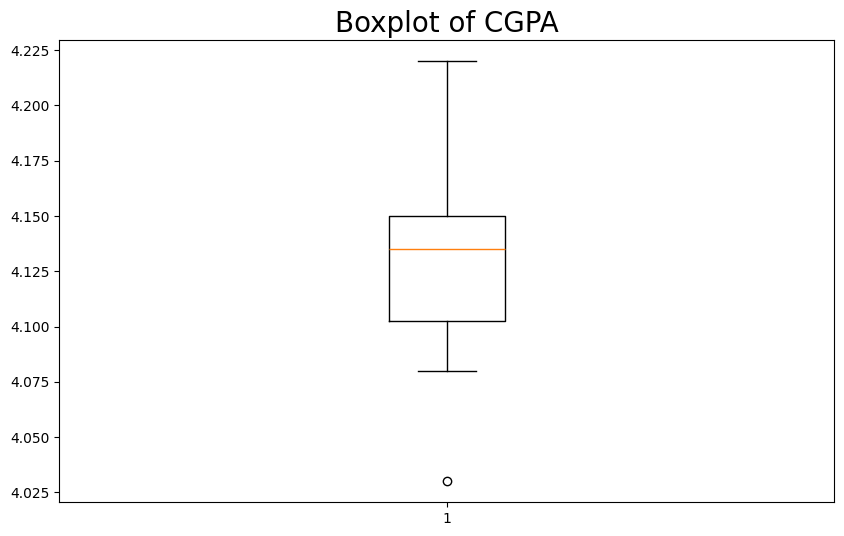

For Tutorial Group 70 - Group 3
Male: 2
Female: 5
EEE: 1
CoB (NBS): 1
CoE: 1
NIE: 1
CEE: 1
SoH: 1
SSS: 1


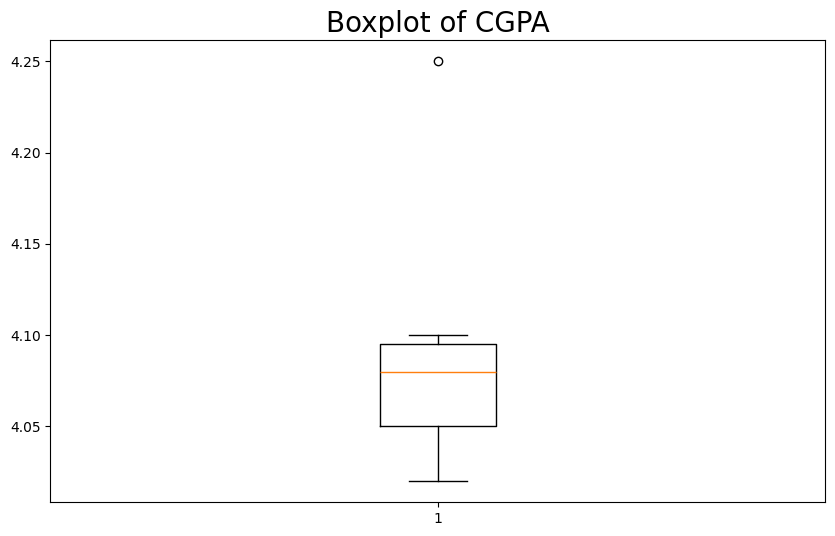

For Tutorial Group 70 - Group 5
Male: 2
Female: 5
EEE: 2
CCEB: 1
CCDS: 1
NIE: 1
SBS: 1
SSS: 1


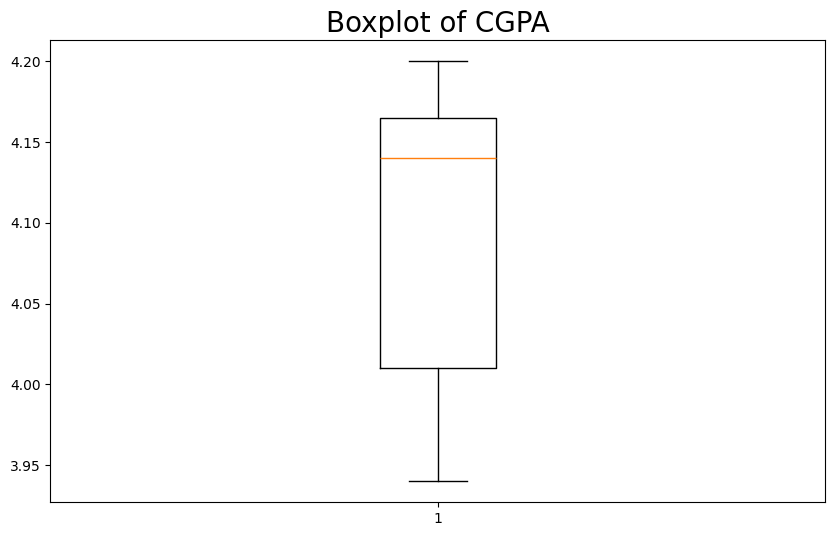

For Tutorial Group 70 - Group 7
Male: 3
Female: 4
LKCMedicine: 1
CCEB: 1
CoB (NBS): 1
MSE: 1
NIE: 1
SoH: 1
CCDS: 1


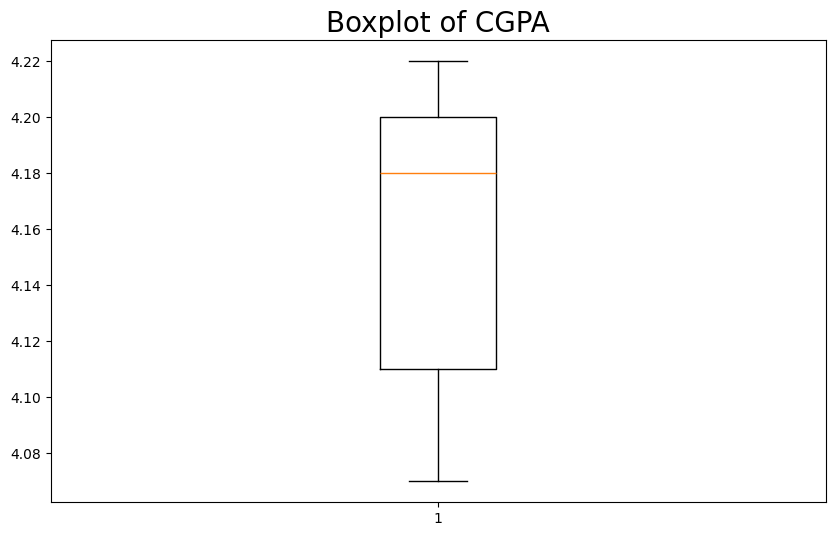

Overall Graphs for Tutorial Group 70
Male: 18
Female: 32
EEE: 4
LKCMedicine: 1
CoB (NBS): 6
CCEB: 4
CCDS: 5
MSE: 4
CoE: 4
MAE: 1
NIE: 6
SBS: 2
CEE: 3
SoH: 4
SSS: 6


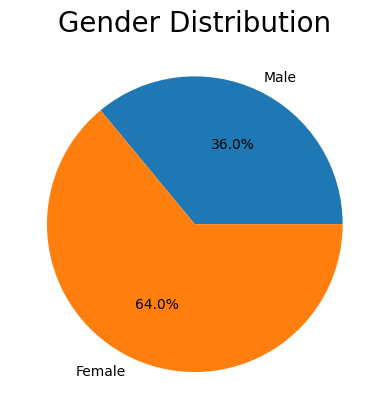

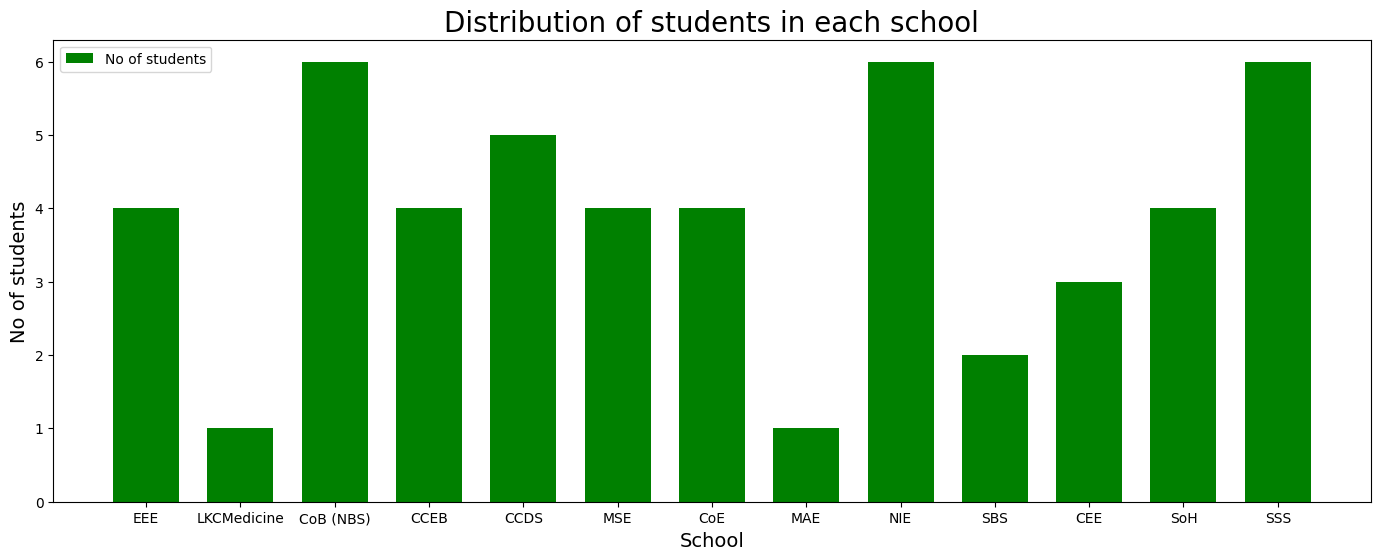

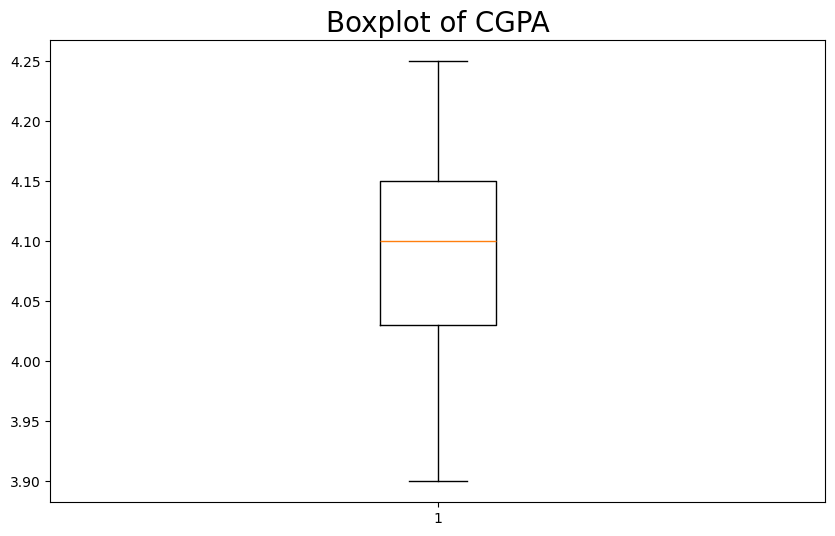

In [24]:
TutGNum = 70
graph_type = 'box'  #'pie' - pie chart 'bar' - Bar graph 'box' - box&whisker


def GetgrpsGraphs(TutGNum, graph_type):
    no_of_Grps_in_TutG = len(finalData[TutGNum-1])


    for i in range(0, no_of_Grps_in_TutG, 2):
        Tut1Grp1 = finalData[TutGNum-1][i]
        print(f"For Tutorial Group {TutGNum} - Group {i+1}")
        TutGrp_raw = getdataintolist(Tut1Grp1)
        T_list_tg_grp,label_tg_grp = data_prep(TutGrp_raw)
        if graph_type == 'pie':
            pie_chart(T_list_tg_grp[0],label_tg_grp[0])
        elif graph_type == 'bar':
            bar_chart(T_list_tg_grp[1],label_tg_grp[1])
        elif graph_type == 'box':
            Box_whisker(T_list_tg_grp[2])
            plt.show(block=False)
            plt.pause(0.001)  # let UI update now
        else:
            print("Invalid graph type")


    print(f"Overall Graphs for Tutorial Group {TutGNum}")
    Graphs_for_TG(70)


GetgrpsGraphs(TutGNum, graph_type)


# Algorithm Evaluation

## Utility for better visualisation

In [25]:
# dictionaryList : List<dict>
# prints dictionary in a line with spacing between keys, accounts for the length of value
def PrintDictListNice(dictionaryList, spacing : int = 18):
    for i in dictionaryList:
        for k,v in i.items():
            contentLength = 10
            if type(v) is float:
                v = f"{v:.3f}-"
            if type(v) is int:
                contentLength = log10(v) + 1
            else:
                contentLength = len(str(v))
            # elif type(v) is bool:
            #     contentLength = len(str(v))
            print(f"{k}: {v}{' ' * max(spacing - contentLength, 1)}", end = '')
        print()

# log10 : log10
def log10(num : int):
    count = 0
    while num >= 10:
        num /= 10
        count += 1
    return count

In [26]:
print(log10(1))
print(log10(20))
print(log10(34))
print(log10(64280))
d = {"test" : 4.236752387546, "a" : "g"}
PrintDictListNice([d])
PrintDictListNice(finalAllTgs[0][0])

0
1
1
4
test: 4.237-            a: g                 
ID: 2091              TG: 1                 School: EEE               Name: Adlan Bin Rahman  Gender: True              CGPA: 4.200-            
ID: 4576              TG: 1                 School: EEE               Name: Jie Zhang         Gender: True              CGPA: 4.030-            
ID: 1075              TG: 1                 School: CoB (NBS)         Name: Felix Yip         Gender: True              CGPA: 4.080-            
ID: 162               TG: 1                 School: SSS               Name: Lila Patel        Gender: False             CGPA: 4.070-            
ID: 4479              TG: 1                 School: CCDS              Name: Amelia Kim        Gender: False             CGPA: 4.110-            
ID: 1417              TG: 1                 School: CoE               Name: Darren Lee        Gender: True              CGPA: 4.120-            
ID: 3861              TG: 1                 School: ASE               Name: 

## Basic Factors
No majority of students of the same following factors:
1. School
2. Gender
3. Current CGPA

General flow:
TODO: insert flowchart
- For each tutorial group, check for a single factor first, to find the group with the least diversity
- Then rank them to see with tutorial group has a group with the least diversity

### Finding the diversity of a single factor of a single group
Required data: list of students in the group, required factor of the student
<br>
Output: The number for diversity
<br>
Start with finding the number of occurences of each factor

In [27]:
# Parameters:
#  factor: string of factor to check, same as the key in the dictionary
#  groupData: data needed as a list of dictionaries
# Return:
#  occurences: dictionary of {factor1: numOccurences, factor2: numOccurences ... } as string:int
def FindOccurencesInGroup(factor, groupData : list) -> dict:
    size = len(groupData)
    occurences = {} # Dictionary to keep track of occurences of each factor
    for i in groupData:
        factorOfStudent = i[factor]
        # If factor already exists in occurences, add 1 to it, otherwise create it and set to 1
        if factorOfStudent in occurences.keys():
            occurences[factorOfStudent] += 1
        else:
            occurences[factorOfStudent] = 1
    return occurences

In [28]:
testGroupData = [
    {"Student ID": 71, "TG" : "G-1", "School" : "SoH", "Name" : "Savannah Taylor", "Gender" : False, "CGPA" : 4.19},
    {"Student ID": 75, "TG" : "G-1", "School" : "CCDS", "Name" : "Sakina Ahmed", "Gender" : False, "CGPA" : 4.03},
    {"Student ID": 162, "TG" : "G-1", "School" : "SSS", "Name" : "Lila Patel", "Gender" : False, "CGPA" : 4.07},
    {"Student ID": 235, "TG" : "G-1", "School" : "CCDS", "Name" : "Ming Zhang", "Gender" : True, "CGPA" : 4.06},
    {"Student ID": 288, "TG" : "G-1", "School" : "CoB (NBS)", "Name" : "Ajay Verma", "Gender" : True, "CGPA" : 4.01}
]
print(FindOccurencesInGroup("School", testGroupData))
print(FindOccurencesInGroup("Gender", testGroupData))
print(FindOccurencesInGroup("CGPA", testGroupData))

{'SoH': 1, 'CCDS': 2, 'SSS': 1, 'CoB (NBS)': 1}
{False: 3, True: 2}
{4.19: 1, 4.03: 1, 4.07: 1, 4.06: 1, 4.01: 1}


#### Then find the most number of occurences out of the total students

In [29]:
# Summary: returns the key and value of the key with the largest value
# Parameters:
#  dictionary: the dict to find the max of
# Return:
#  key : list, values : int, where key is the key with highest value
def FindMaxInDict(dictionary: dict) -> (list, int):
    maxKeys = []
    maxVal = 0
    for key, value in dictionary.items():
        # update maxKeys and maxVal whenever a new value >= current maxVal
        if value > maxVal:
            maxKeys = [key]
            maxVal = value
        elif value == maxVal:
            maxKeys.append(key)
    return maxKeys, maxVal

In [30]:
print(FindMaxInDict(FindOccurencesInGroup("School", testGroupData)))
print(FindMaxInDict(FindOccurencesInGroup("Gender", testGroupData)))
print(FindMaxInDict(FindOccurencesInGroup("CGPA", testGroupData)))

(['CCDS'], 2)
([False], 3)
([4.19, 4.03, 4.07, 4.06, 4.01], 1)


## CGPA case
But this does not work for CGPA, for that we want to find the mean, range, and midrange instead
If we use only mean, a majority of high CGPA with a very low CGPA will result in a medium CGPA, this can be solved by looking at midrange, where a high difference between midrange and mean will show that this is happening
However, even with these two, a group will all medium CGPAs will also result in medium mean, and low midrange difference, therefore we add range to determine that this is happening if the range is small.
In conclusion, the result we are looking for is one with an medium mean, high range, and low difference between midrange and mean.
### Finding mean, midrange, and range

In [31]:
def Mean(*nums) -> float:
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    return sum(nums) / len(nums)

def Range(*nums) -> float:
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    return max(nums) - min(nums)

def Midrange(*nums) -> float:
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    return (max(nums) + min(nums)) / 2

def Median(*nums) -> float:
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    # TODO: replace with another self-made sort cherry pls
    nums.sort()
    total = len(nums)
    mid = total // 2
    if total % 2:
        return (nums[mid] + nums[mid+1]) / 2
    return nums[mid]

In [32]:
testList = [4.19, 4.03, 4.07, 4.06, 4.01]
print(Mean(testList))
print(Range(testList))
print(Midrange(testList))
print(Median(testList))

4.072
0.1800000000000006
4.1
4.0649999999999995


## Calculating for CGPA

In [33]:
# Parameters:
#  medianCGPA: median CGPA to use for calculation (likely the tutorial grp's)
#  CGPARange: Range of CGPA to use for calculation (likely the tutorial grp's)
#  groupData: list of studentData to find CGPA diversity (likely a group within the tut grp)
# Return:
#  score: overall score of CGPA
#  cGPADetails: dictionary of {factor: percent} the factor "balance" students with higher CGPA - students with lower CGPA than median
def CalculateCGPADiversity(medianCGPA : float, CGPARange : float, *groupData) -> (int, dict):
    if len(groupData) == 1 and type(groupData[0]) is list:
        groupData = groupData[0]

    cGPADetails = {}
    # Calculate higher and lowers
    lower = higher = 0
    cGPAs = ExtractCGPA(groupData)
    for gpa in cGPAs:
        if gpa < medianCGPA:
            lower += 1
        elif gpa > medianCGPA:
            higher += 1
    cGPADetails["balance"] = higher - lower

    # Calculate the score for each factor
    cGPADetails["mean"] = Mean(cGPAs)
    cGPADetails["range"] = Range(cGPAs)
    cGPADetails["midrange"] = Midrange(cGPAs)

    # Score 0 to 100, 100 is most diverse possible
    # Usage of 5 as is prevalent as it is the max CGPA and max difference between lowest and highest CGPA
    
    # vv How close mean is to the median vv
    cGPADetails["meanScore"] = (5 - abs(cGPADetails["mean"] - medianCGPA)) * 20
    # vv Ratio of grp's range and tutorial grp's range vv
    cGPADetails["rangeScore"] = cGPADetails["range"] / CGPARange * 100
    # vv How far midrange is from mean vv   most diverse ==> mean of x, midrange of x
    cGPADetails["midrangeScore"] = (1 - abs(cGPADetails["mean"] - cGPADetails["midrange"])) * 100
    # vv Lowest: score = 0 when abs(balance) = Num of grp members, Highest: score = 100 when balance = 0 vv 
    cGPADetails["balanceScore"] = (len(groupData) - abs(cGPADetails["balance"])) / len(groupData) * 100
    
    # Overall score out of 100
    # Weightages for what we consider more important
    W_RANGE = 1
    W_MIDRANGE = 1
    W_MEAN = 2
    W_BALANCE = 2
    
    score = (cGPADetails["meanScore"] * W_MEAN\
             + cGPADetails["rangeScore"] * W_RANGE\
             + cGPADetails["midrangeScore"] * W_MIDRANGE\
             + cGPADetails["balanceScore"] * W_BALANCE) / sum([W_MEAN, W_RANGE, W_MIDRANGE, W_BALANCE])
    return score, cGPADetails

# Returns a list of CGPA of the students in groupData
def ExtractCGPA(*groupData) -> list:
    if len(groupData) == 1 and type(groupData[0]) is list:
        groupData = groupData[0]

    cGPAs = []
    for i in groupData:
        cGPAs.append(i["CGPA"])
    return cGPAs

# Returns a list of CGPA of the students in groupData
def TutGrpExtractCGPA(tutGroupData) -> list:
    cGPAs = []
    for i in tutGroupData:
        cGPAs.extend(ExtractCGPA(i))
    return cGPAs

In [34]:
#TODO : revise the calculation of balance factor by taking into account buckets rather than median
testGroupData = finalAllTgs[0]
medianCGPA = Median(TutGrpExtractCGPA(testGroupData))
rangeCGPA = Range(TutGrpExtractCGPA(testGroupData))
print(medianCGPA)
for i in range(len(testGroupData)):
    print(f"test group: {i}")
    PrintDictListNice(testGroupData[i])
    print()
    result = CalculateCGPADiversity(medianCGPA, rangeCGPA, testGroupData[i])
    print("Score: ", result[0])
    PrintDictListNice([result[1]])
# print(testGroupData)


4.09
test group: 0
ID: 2091              TG: 1                 School: EEE               Name: Adlan Bin Rahman  Gender: True              CGPA: 4.200-            
ID: 4576              TG: 1                 School: EEE               Name: Jie Zhang         Gender: True              CGPA: 4.030-            
ID: 1075              TG: 1                 School: CoB (NBS)         Name: Felix Yip         Gender: True              CGPA: 4.080-            
ID: 162               TG: 1                 School: SSS               Name: Lila Patel        Gender: False             CGPA: 4.070-            
ID: 4479              TG: 1                 School: CCDS              Name: Amelia Kim        Gender: False             CGPA: 4.110-            
ID: 1417              TG: 1                 School: CoE               Name: Darren Lee        Gender: True              CGPA: 4.120-            
ID: 3861              TG: 1                 School: ASE               Name: Layla Torres      Gender: False    

## Calculating the factors for each group
Combine all the previous functions together to obtain the data for the least diverse of each factor and which group(s) they belong to

In [35]:
# Parameters:
#  factors: list of strings of factor to check, same as the key in the dictionary
#  groupsDatas: List of datas needed as a list of dictionaries
# Return:
#  leastDiverse: dictionary of {factor1: occurencesPercent, factor2: occurencesPercent ... } as string:int
#  grpIdx: dictionary of the grps that have the least diversity for the factor {factor1: groups}
def FindLeastDiverseInTutorialGroup(factors, *groupsDatas) -> (dict, dict):
    if len(groupsDatas) == 1 and type(groupsDatas[0]) is list:
        groupsDatas = groupsDatas[0]

    # Get data required for calculating diversity score for CGPA
    allCGPA = TutGrpExtractCGPA(testGroupData)
    tutMedianCGPA = Median(allCGPA)
    tutRangeCGPA = Range(allCGPA)
    
    grpIdx = {}
    leastDiverse = {}
    for factor in factors:
        # Set default value to replace
        leastDiverseOccurence = (["factorResult"], 0) # % of highest occurence, i.e. 90% of students are from ccds
        if factor == "CGPA":
            leastDiverseOccurence = (["CGPA score"], 100) # % of highest occurence, i.e. 90% of students are from ccds

        currentGrpIdx = 0
        for group in groupsDatas:
            # Special CGPA case
            if factor == "CGPA":
                result = CalculateCGPADiversity(tutMedianCGPA, tutRangeCGPA, group) # result is (score : float, details : dictionary)
                occurence = [["CGPA score"], result[0]]
                currentPercent = occurence[1]
            else:
                occurence = FindMaxInDict(FindOccurencesInGroup(factor, group)) # result is ([least diverse factors(i.e. CCDS, False)], occurence count)
                currentPercent = occurence[1] / len(group)
            # Less diverse so replace
            if (factor != "CGPA" and currentPercent > leastDiverseOccurence[1])\
            or (factor == "CGPA" and currentPercent < leastDiverseOccurence[1]): # Special CGPA case where currentPercent is CGPA diversity score, so want the lowest
                leastDiverseOccurence = ([occurence[0]], currentPercent)
                grpIdx[factor] = [currentGrpIdx]
            # Same diversity so append
            elif currentPercent == leastDiverseOccurence[1]:
                # because list in tuples cannot append
                leastDiverseOccurence0 = []
                leastDiverseOccurence0 = (leastDiverseOccurence[0])
                leastDiverseOccurence0.append(occurence[0])
                
                leastDiverseOccurence = (leastDiverseOccurence0, currentPercent)
                grpIdx[factor].append(currentGrpIdx)
            currentGrpIdx += 1
        leastDiverse[factor] = leastDiverseOccurence
    return leastDiverse, grpIdx

## Put it into a function that prints out all the data

In [36]:
# Parameters:
#  groupsData: List of datas needed as a list of dictionaries -> Tutorial group
# Return: (same as function FindLeastDiverseInTutorialGroup)
#  leastDiverse: dictionary of {factor1: occurencesPercent, factor2: occurencesPercent ... } as string:int
#  grpIdx: dictionary of the grps that have the least diversity for the factor {factor1: groups}
def PrintResultForTutorialGroup(groupData) -> (dict, dict):
    allCGPA = TutGrpExtractCGPA(groupData)
    tutMedianCGPA = Median(allCGPA)
    tutRangeCGPA = Range(allCGPA)
    for i in range(len(groupData)):
        print(f"group: {i}")
        PrintDictListNice(groupData[i])
        print()
        result = CalculateCGPADiversity(medianCGPA, rangeCGPA, groupData[i])
        print("CGPA Score: ", result[0], end="\n\n")
    # print(groupData)
    # print(FindLeastDiverseInTutorialGroup(["School", "Gender", "CGPA"], groupData))
    data = FindLeastDiverseInTutorialGroup(["School", "Gender", "CGPA"], groupData)
    PrintFactorNice(data)
    return data

# data : the return of FindLeasstDiverseInTutorialGroup
def PrintFactorNice(data : (dict, dict)):
    for factor in data[0].keys():
        percentOrScore = f"{data[0][factor][1]:.2f}" if factor == "CGPA" else f"{data[0][factor][1] * 100 :.2f}%"
        print(FormatFactors(f"Most common {factor}(s): {data[0][factor][0]} at {percentOrScore} found in group(s): {data[1][factor]}"))

def FormatFactors(string : str):
    output = string.replace("Most common CGPA", "Lowest CGPA diversity score")\
                    .replace("[['CGPA score']] at ", "")\
                    .replace("],", " |")\
                    .replace("True", "Male")\
                    .replace("False", "Female")\
                    .replace("[", "")\
                    .replace("]", "")
    return output

# Test
PrintResultForTutorialGroup(finalGrps)

group: 0
ID: 3721              TG: 120               School: CoB (NBS)         Name: Samantha Lee      Gender: False             CGPA: 4.520-            
ID: 5220              TG: 120               School: CoB (NBS)         Name: Rishi Singh       Gender: True              CGPA: 4.080-            
ID: 3222              TG: 120               School: CCDS              Name: Kang Lei          Gender: False             CGPA: 4.040-            
ID: 5835              TG: 120               School: MAE               Name: Samuel Cook       Gender: True              CGPA: 4.020-            
ID: 822               TG: 120               School: CCEB              Name: Riku Tanaka       Gender: False             CGPA: 4.030-            
ID: 2420              TG: 120               School: CEE               Name: Faisal Bin Yusof  Gender: True              CGPA: 4.570-            
ID: 3859              TG: 120               School: CoE               Name: Kai Wei           Gender: True              C

({'School': ([['CCDS'], ['CEE'], ['EEE']], 0.2857142857142857),
  'Gender': ([[True]], 0.7142857142857143),
  'CGPA': ([['CGPA score']], 56.852736318407956)},
 {'School': [1, 3, 6], 'Gender': [5], 'CGPA': [2]})

## Calculating for every tutorial group
Calculate and print out the results for every group in every tutorial group
Also collects the lowest diversity results of every tutorial group for later use

In [37]:
# How the variable for data of all students sorted into grps looks like
for TG in range(len(finalAllTgs)):
    for grp in range(len(finalAllTgs[TG])):
        PrintDictListNice(finalAllTgs[TG][grp])
        print()

ID: 2091              TG: 1                 School: EEE               Name: Adlan Bin Rahman  Gender: True              CGPA: 4.200-            
ID: 4576              TG: 1                 School: EEE               Name: Jie Zhang         Gender: True              CGPA: 4.030-            
ID: 1075              TG: 1                 School: CoB (NBS)         Name: Felix Yip         Gender: True              CGPA: 4.080-            
ID: 162               TG: 1                 School: SSS               Name: Lila Patel        Gender: False             CGPA: 4.070-            
ID: 4479              TG: 1                 School: CCDS              Name: Amelia Kim        Gender: False             CGPA: 4.110-            
ID: 1417              TG: 1                 School: CoE               Name: Darren Lee        Gender: True              CGPA: 4.120-            
ID: 3861              TG: 1                 School: ASE               Name: Layla Torres      Gender: False             CGPA: 4.52

In [38]:
allGroupData = finalAllTgs # finalAllTgs[TG][grp] => list of students(dict)

# all TG's least diverse
allTG_LD = [] # list of dictionaries of {factor: ([most repeated], occurence percentage/CGPA score)}
allTG_LD_Idx = [] # list of dictionaries of {factor: [idx*]}

# Each loop processes and prints a single TG
for TG in range(len(finalAllTgs)):
    currentTGData = finalAllTgs[TG]
    tgLD = {} # least diverse in TG, {factor: percentage}
    tgLDIdx = -1
    data = PrintResultForTutorialGroup(currentTGData)
    print(end="\n\n")

    # Add data to global variables
    tgLD = data[0]
    tgLDIdx = data[1]
    allTG_LD.append(tgLD)
    allTG_LD_Idx.append(tgLDIdx)

group: 0
ID: 2091              TG: 1                 School: EEE               Name: Adlan Bin Rahman  Gender: True              CGPA: 4.200-            
ID: 4576              TG: 1                 School: EEE               Name: Jie Zhang         Gender: True              CGPA: 4.030-            
ID: 1075              TG: 1                 School: CoB (NBS)         Name: Felix Yip         Gender: True              CGPA: 4.080-            
ID: 162               TG: 1                 School: SSS               Name: Lila Patel        Gender: False             CGPA: 4.070-            
ID: 4479              TG: 1                 School: CCDS              Name: Amelia Kim        Gender: False             CGPA: 4.110-            
ID: 1417              TG: 1                 School: CoE               Name: Darren Lee        Gender: True              CGPA: 4.120-            
ID: 3861              TG: 1                 School: ASE               Name: Layla Torres      Gender: False             C

## Print all the factors and find the least diverse overall with regards to composition of tutorial group

In [48]:
# Least diverse overall of each factor [score/percentage, [TG(s)], deviation from TG stats]
LD_CGPA = [100, [-1]]
LD_School = [0, [-1], 0]
LD_Gender = [0, [-1], 0]
# Each loop processes 1 TG
for i in range(len(allTG_LD)):
    # Print the data nicely
    print(f"Tutorial group: {i}:")
    PrintFactorNice((allTG_LD[i], allTG_LD_Idx[i]))
    print(end="\n\n")

    print(allTG_LD[i])
    # Find the least diverse overall, with regards to composition of tutorial group
    # CGPA
    
    # School
    # Gender

Tutorial group: 0:
Most common School(s): 'EEE' | 'EEE' | 'CoB (NBS)', 'SoH', 'CCDS' at 28.57% found in group(s): 1, 2, 3
Most common Gender(s): Female at 71.43% found in group(s): 5
Lowest CGPA diversity score(s): 77.24 found in group(s): 2


{'School': ([['EEE'], ['EEE'], ['CoB (NBS)', 'SoH', 'CCDS']], 0.2857142857142857), 'Gender': ([[False]], 0.7142857142857143), 'CGPA': ([['CGPA score']], 77.23866382373845)}
Tutorial group: 1:
Most common School(s): 'CCDS', 'CCEB', 'EEE', 'CEE', 'MAE', 'SoH', 'NIE' | 'CCDS', 'CCEB', 'EEE', 'CEE', 'SSS', 'MSE', 'SoH' | 'CCDS', 'CCEB', 'EEE', 'CEE', 'MSE', 'MAE', 'NIE' | 'CCDS', 'CCEB', 'CoB (NBS)', 'CEE', 'MSE', 'MAE', 'SBS' | 'CCDS', 'CCEB', 'CoB (NBS)', 'SSS', 'WKW SCI', 'SBS', 'SPMS' | 'CCDS', 'EEE', 'CoB (NBS)', 'SSS', 'WKW SCI', 'SBS', 'ADM' at 14.29% found in group(s): 1, 2, 3, 4, 5, 6
Most common Gender(s): Female | Female | Female at 71.43% found in group(s): 4, 5, 6
Lowest CGPA diversity score(s): 72.86 found in group(s): 3


{'School': ([

# Graphical plots and things

# Challenges and Issues

- Jupyter notebook with git results in tons of merge conflicts stemming from it being a giant JSon, especially with execution_count, output, and when moving around cells. Outputs are also so large that they make it hard to find merge conflicts that matter.

# Conclusion

# Debug test things or test cases?
doubt they will give marks for test cases tho, prob just leave this for our own use and remove before submission
Highlight